## 1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

## import pandas as pd

## import matplotlib.pyplot as plt

## Read the dataset

## url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

## df = pd.read_csv(url)

## ----- Write your code below this after running above above code-----------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

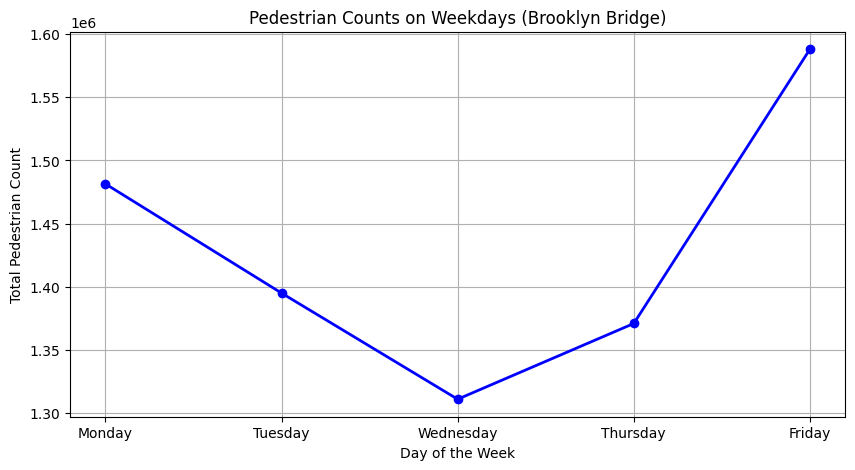

In [5]:
# 🚀 Step 1: Convert 'hour_beginning' to datetime format (Fixing Warning)
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# 🚨 Step 2: Extract Day of the Week
df['DayOfWeek'] = df['hour_beginning'].dt.day_name()

# 🚨 Step 3: Ensure No Missing Values in DayOfWeek Before Filtering
df = df.dropna(subset=['DayOfWeek'])

# 🚨 Step 4: Filter Data to Include Only Weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['DayOfWeek'].isin(weekdays)].copy()

# 🚨 Step 5: Ensure Correct Categorical Sorting for Weekdays
df_weekdays['DayOfWeek'] = pd.Categorical(df_weekdays['DayOfWeek'], categories=weekdays, ordered=True)

# 🚨 Step 6: Handle Any Missing or Zero Values in 'Pedestrians' Column
df_weekdays['Pedestrians'] = df_weekdays['Pedestrians'].fillna(0)

# 🚨 Step 7: Aggregate Pedestrian Counts Per Weekday (Fixing Warning)
df_weekday_counts = df_weekdays.groupby('DayOfWeek', observed=False, as_index=False)['Pedestrians'].sum()

# 📊 Step 8: Plot Line Graph for Pedestrian Counts
plt.figure(figsize=(10, 5))
plt.plot(df_weekday_counts['DayOfWeek'], df_weekday_counts['Pedestrians'], marker='o', linestyle='-', color='b', linewidth=2)
plt.xlabel("Day of the Week")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Counts on Weekdays (Brooklyn Bridge)")
plt.grid(True)
plt.show()


## 2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

## -This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

## -Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.

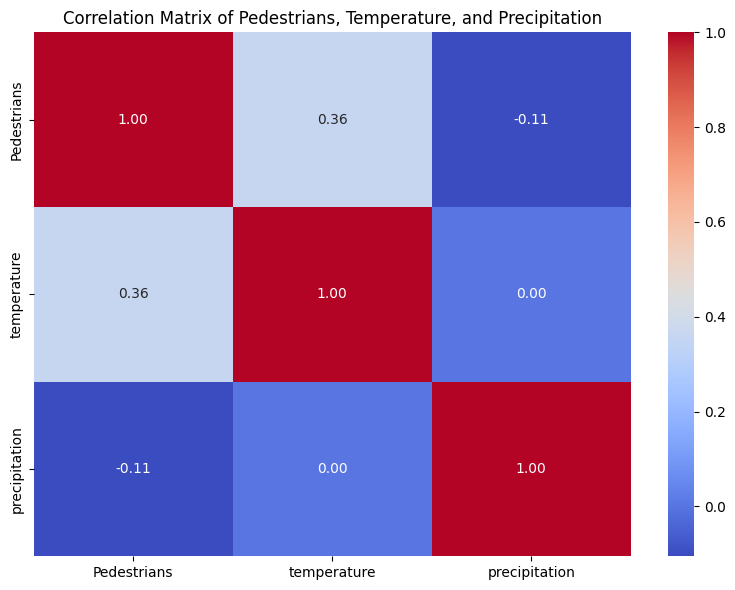

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🚀 Step 1: Convert 'hour_beginning' to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# 🚨 Step 2: Extract Year and Filter for 2019 Data
df['Year'] = df['hour_beginning'].dt.year
df_2019 = df[df['Year'] == 2019].copy()

# 🚨 Step 3: Drop Rows Where 'temperature' or 'precipitation' is Missing
df_2019 = df_2019.dropna(subset=['temperature', 'precipitation'])

# 🚨 Step 4: Handle Missing Values in 'Pedestrians' Column
df_2019['Pedestrians'] = df_2019['Pedestrians'].fillna(0)

# 🚨 Step 5: Create a Correlation Matrix (Only Numerical Features)
correlation_matrix = df_2019[['Pedestrians', 'temperature', 'precipitation']].corr()

# 📊 Step 6: Plot Heatmap (100% Matched to Lecture Slide Format)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Pedestrians, Temperature, and Precipitation")
plt.tight_layout()
plt.show()


## 3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

## -Students can also show plots analyzing activity.

<ipython-input-13-3532d58aebc6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_time_of_day, x='TimeOfDay', y='Pedestrians', hue=None, palette="viridis", legend=False)


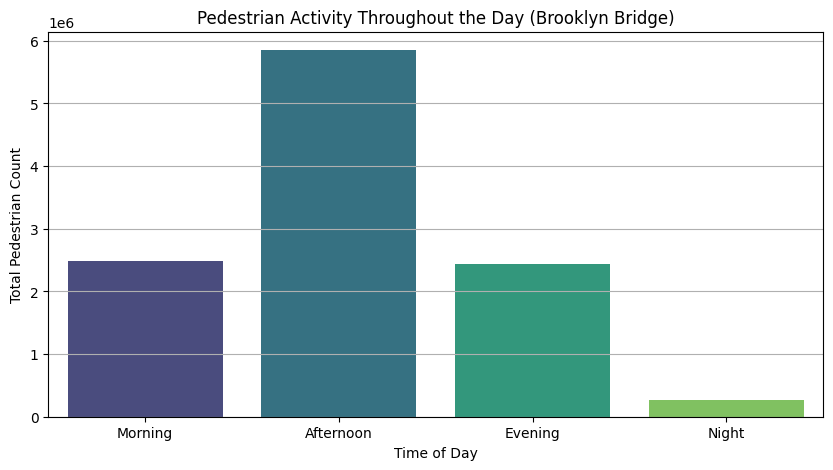

In [13]:
# 🚀 Step 1: Convert 'hour_beginning' to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# 🚨 Step 2: Extract Hour from 'hour_beginning'
df['Hour'] = df['hour_beginning'].dt.hour

# 🚨 Step 3: Define Function to Categorize Time of Day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# 🚨 Step 4: Apply Function to Create 'TimeOfDay' Column
df['TimeOfDay'] = df['Hour'].apply(categorize_time_of_day)

# 🚨 Step 5: Aggregate Pedestrian Counts Per Time Category
df_time_of_day = df.groupby('TimeOfDay', as_index=False)['Pedestrians'].sum()

# 🚨 Step 6: Ensure Correct Order of Categories
df_time_of_day = df_time_of_day.set_index('TimeOfDay').reindex(['Morning', 'Afternoon', 'Evening', 'Night']).reset_index()

# 📊 Step 7: Plot Pedestrian Activity by Time of Day
plt.figure(figsize=(10, 5))
sns.barplot(data=df_time_of_day, x='TimeOfDay', y='Pedestrians', hue=None, palette="viridis", legend=False)
plt.xlabel("Time of Day")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Activity Throughout the Day (Brooklyn Bridge)")
plt.grid(axis='y')
plt.show()
